In [ ]:
""" 1. we will collect the stock data -- AAPL
    2. preprocss the data
    3. create a stacked LSTM model
    4. predict the test data and plot the output
    5. Predict the futu ter 30 days and plot the output
"""

' 1. we will collect the stock data -- AAPL \n    2. preprocss the data\n    3. create a stacked LSTM model\n    4. predict the test data and plot the output \n    5. Predict the futu ter 30 days and plot the output \n'

In [ ]:
#  data collection
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
key = 'cf5592908c707fdcaac3a55ecc12c397da022b6c'


In [ ]:
# df=pdr.get_data_tiingo('MSFT',api_key=key)
# df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab/stock prediction (stacked LSTM)/AAPL.csv')

In [ ]:
df.shape

(1258, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [ ]:
df.isnull().sum()


Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
df1= df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

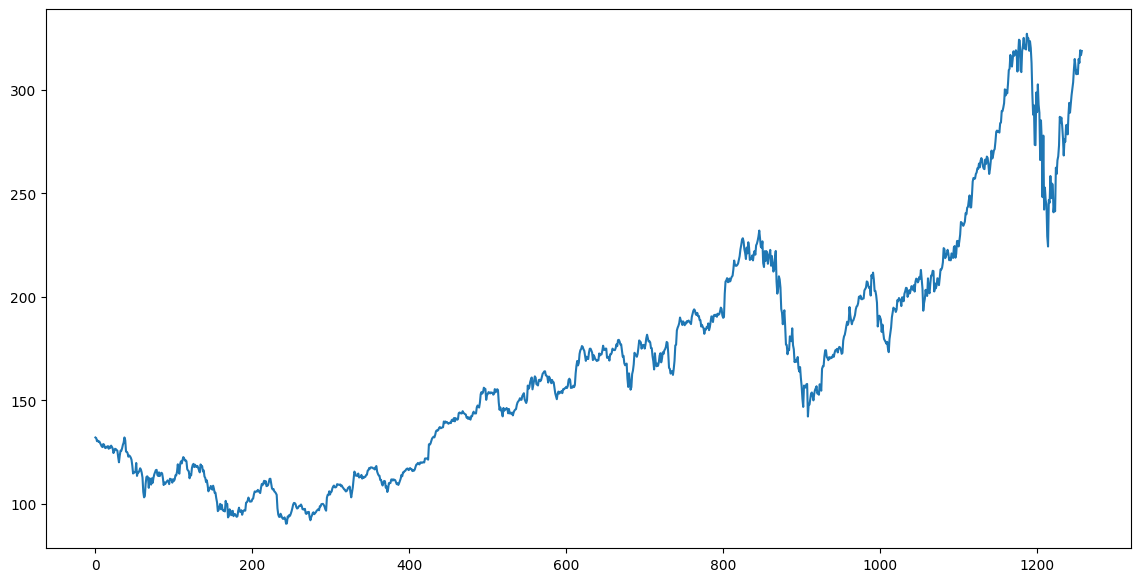

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

plt.plot(df1)

In [ ]:
# LSTM are sensitive to scale of the data , so transform the values
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [ ]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [ ]:
def create_dataset(dataset,timestep=1):
  datax,datay=[],[]
  for i in range(len(dataset)+timestep-1):
    a=dataset[i:(i + timestep),0]
    datax.append(a)
    datay.append(dataset[i+timestep,0])
    return np.array(datax) ,np.array(datay)


In [ ]:
timestep=100
xtrain,ytrain=create_dataset(train_data,timestep=timestep)
xtest,ytest=create_dataset(test_data,timestep=timestep)

In [ ]:
# creating lstm model
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtrain.shape[0],xtest.shape[1],1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences =True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.0077 - val_loss: 0.0509
Epoch 2/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0035 - val_loss: 0.0304
Epoch 3/100
1/1 [==============================] - 0s 113ms/step - loss: 8.4802e-04 - val_loss: 0.0137
Epoch 4/100
1/1 [==============================] - 0s 115ms/step - loss: 2.3906e-05 - val_loss: 0.0045
Epoch 5/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 6/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 7/100
1/1 [==============================] - 0s 116ms/step - loss: 8.5024e-04 - val_loss: 0.0106
Epoch 8/100
1/1 [==============================] - 0s 117ms/step - loss: 2.2989e-04 - val_loss: 0.0159
Epoch 9/100
1/1 [==============================] - 0s 121ms/step - loss: 2.0475e-06 - val_loss: 0.0210
Epoch 10/100
1/1 [==============================] - 0s 116ms/step - loss: 9.4247e-05 - val_l

In [ ]:
testpredict=model.predict(xtest)

1/1 [==============================] - 3s 3s/step


In [ ]:
test_predict=scaler.inverse_transform(testpredict)

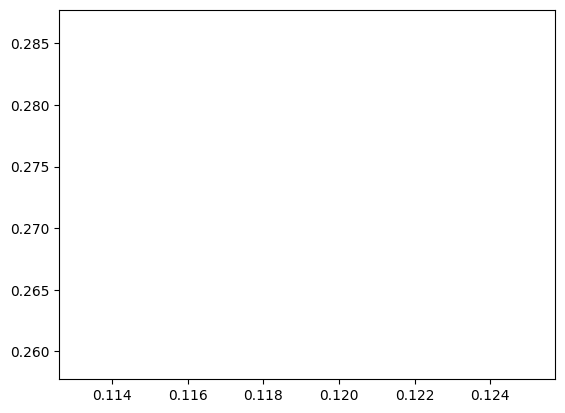

In [ ]:
plt.plot(test_predict,ytest)